## Actividad 2

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [43]:
def fixfloats(value):
    value = value.replace(',','.')
    return float(value)

In [44]:
csv = pd.read_csv("measurements.csv")

csv['distance'] = csv['distance'].apply(fixfloats)
csv['consume'] = csv['consume'].apply(fixfloats)
csv = csv.astype({'gas_type':'str'})

csv['specials'] = csv['specials'].fillna('None')

csv = csv.dropna(subset=['temp_inside'])
csv['temp_inside'] = csv['temp_inside'].apply(fixfloats)

csv.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,None,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,None,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,None,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,None,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,None,E10,0,0,0,NaN,NaN


In [45]:
X = csv[['distance']] 
y = csv['consume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
poly_features = PolynomialFeatures(degree=6, include_bias=False).fit_transform(X_train)

polinomial = LinearRegression().fit(poly_features, y_train)

ridge_regr = Ridge(alpha=0.5, max_iter=2500000).fit(poly_features, y_train)

lasso_regr = Lasso(alpha=5e-5, max_iter=2500000).fit(poly_features, y_train)

d:\VSCode\UC\Curso 3 Aplicaciones IA\entornoConda\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.02634e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
d:\VSCode\UC\Curso 3 Aplicaciones IA\entornoConda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.141e+02, tolerance: 3.304e-02
  model = cd_fast.enet_coordinate_descent(


In [47]:
xaxis = np.linspace(min(X_test['distance']), max(X_test['distance']), 1000)
poly_test = PolynomialFeatures(degree=6, include_bias=False).fit_transform(xaxis.reshape(-1,1))

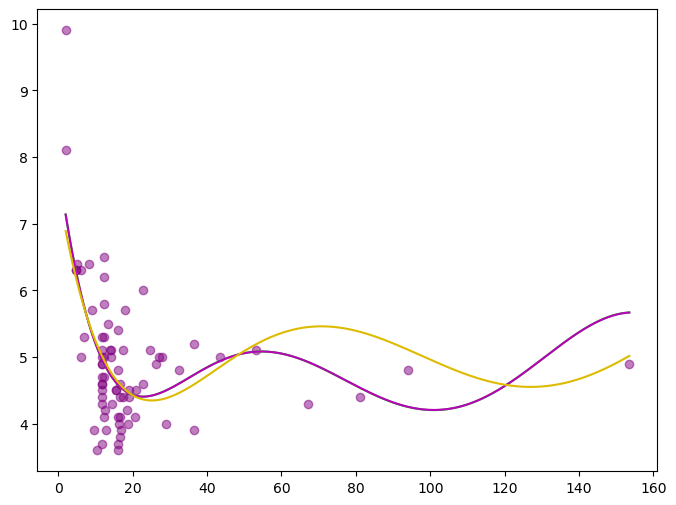

In [48]:
plt.figure(figsize=[8,6])
plt.scatter(X_test['distance'], y_test, c='#800080', alpha= 0.5)
plt.plot(xaxis, polinomial.predict(poly_test), c='#00dd00')
plt.plot(xaxis, ridge_regr.predict(poly_test), c='#bb00bb')
plt.plot(xaxis, lasso_regr.predict(poly_test), c='#ddbb00')
plt.show()

In [49]:
X_train = PolynomialFeatures(degree=6, include_bias=False).fit_transform(X_train)
X_test = PolynomialFeatures(degree=6, include_bias=False).fit_transform(X_test)

In [73]:
MSE=[]

for a in range(0,101,5):

    a = 0.1/(10**(a/2))

    # Crear y ajustar el modelo Ridge
    ridge = Ridge(alpha=a, max_iter=500000)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)

    # Crear y ajustar el modelo Lasso
    lasso = Lasso(alpha=a, max_iter=500000)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)

    # Evaluar el desempeño de ambos modelos
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)

    MSE.append([float(a),float(mse_ridge),float(mse_lasso)])
# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(MSE, columns=['Alpha', 'MSE_Ridge', 'MSE_Lasso'])

print(MSE)

d:\VSCode\UC\Curso 3 Aplicaciones IA\entornoConda\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.02428e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
d:\VSCode\UC\Curso 3 Aplicaciones IA\entornoConda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.255e+02, tolerance: 3.304e-02
  model = cd_fast.enet_coordinate_descent(
d:\VSCode\UC\Curso 3 Aplicaciones IA\entornoConda\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.02377e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
d:\VSCode\UC\Curso 3 Aplicaciones IA\entornoConda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py

[[0.1, 0.5138785973498137, 0.6270430981165118], [0.00031622776601683794, 0.5138459775885353, 0.6153698149581281], [1e-06, 0.5138458745593609, 0.6153437624902323], [3.1622776601683795e-09, 0.5138458741170279, 0.6153436802124428], [1.0000000000000001e-11, 0.5138458741736546, 0.6153436799527343], [3.1622776601683796e-14, 0.5138458741736546, 0.6153436799516239], [1.0000000000000001e-16, 0.5138458741736546, 0.6153436799514967], [3.162277660168379e-19, 0.5138458741736546, 0.6153436799514967], [1.0000000000000001e-21, 0.5138458741736546, 0.6153436799514967], [3.1622776601683795e-24, 0.5138458741736546, 0.6153436799514967], [9.999999999999999e-27, 0.5138458741736546, 0.6153436799514967], [3.162277660168379e-29, 0.5138458741736546, 0.6153436799514967], [1e-31, 0.5138458741736546, 0.6153436799514967], [3.1622776601683794e-34, 0.5138458741736546, 0.6153436799514967], [1.0000000000000001e-36, 0.5138458741736546, 0.6153436799514967], [3.1622776601683794e-39, 0.5138458741736546, 0.6153436799514967],

d:\VSCode\UC\Curso 3 Aplicaciones IA\entornoConda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.169e+02, tolerance: 3.304e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


<i> - En el modelo de Ridge se observa que a medida de que aumenta el Aplha, disminuye el error, mientras que en el modelo de Lasso para este caso aumenta el MSE, a medida que aumenta el Alpha.

<i>  - El modelo adecuado de penalizacion es el de Ridge, se observa que para cualquier valor de Aplha para este conjunto de datos es menor al MSE entregado por el modelo de Lasso

Text(0.5, 0, 'Alpha')

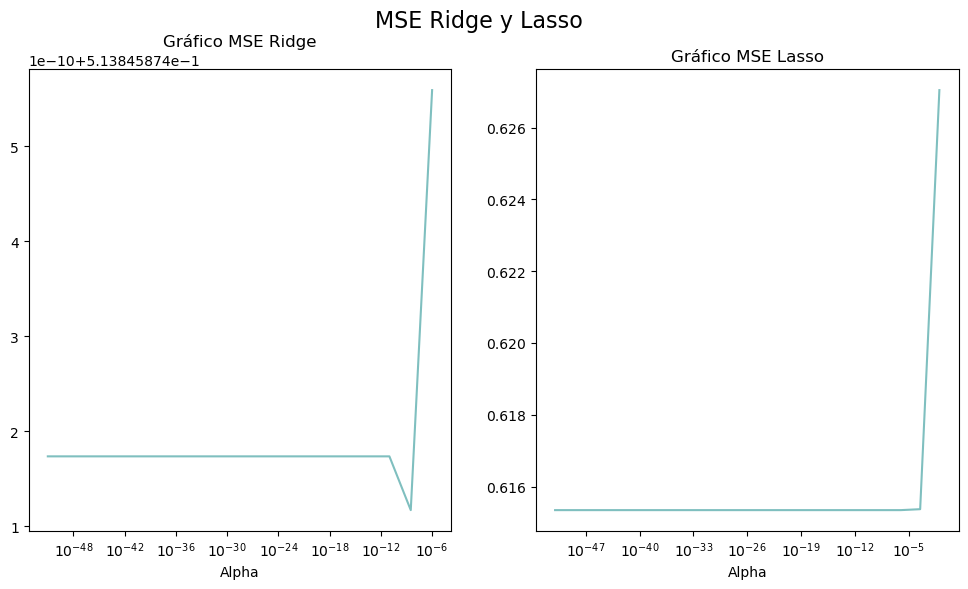

In [83]:
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig2.suptitle("MSE Ridge y Lasso", fontsize=16)

ax1.plot(results_df['Alpha'][-19:], results_df['MSE_Ridge'][-19:], c= '#008080', alpha= 0.5)
ax1.set_xscale("log")
ax1.set_title("Gráfico MSE Ridge")
ax1.set_xlabel("Alpha")

ax2.plot(results_df['Alpha'], results_df['MSE_Lasso'], c= '#008080', alpha= 0.5)
ax2.set_xscale("log")
ax2.set_title("Gráfico MSE Lasso")
ax2.set_xlabel("Alpha")

In [40]:
results_df[-5:]

,Alpha,MSE_Ridge,MSE_Lasso
19994,0.0006,0.970172,0.970174
19995,0.0005,0.970172,0.970173
19996,0.0004,0.970172,0.970173
19997,0.0003,0.970172,0.970173
19998,0.0002,0.970172,0.970172
